# 1. Joint Recurrence Plot

<br>
    
**Time series**

The *time series* ($S$) is a set of observations. It can be defined as

$$S = \left\lbrace s_{1}, s_{2}, \cdots, s_{M} \right\rbrace,$$ 

where $s_{i}$ is the observation recorded at time $i = \Delta t$ (where $\Delta t$ is the sampling time) and $M$ is the number of observations.

<br>

**Phase space trajectory**

The phase space trajectory can be reconstructed from a time series $S$ using *time delay embedding method* [1]

$$ \vec{x}_{i} = \left( s_{i}, s_{i+\tau}, s_{i+2\tau}, \cdots, s_{i+(m-1)\tau} \right), $$

where $m$ is an embedding dimension and $\tau$ is a time delay. Usually, the embedding dimensiom and the time delay can be estimated from the time series $S$ using false nearest neighbor algorithm [2,3] and mutual information function [4].

<br>

**Distance matrix**

The *distance matrix* ($D$) stores the distance between pairs of states. It can be mathematically expressed as

$$D_{i,j}^{m} = \left \| \vec{x}_{i}-\vec{x}_{j} \right \|, \;\; \vec{x}_{i}, \vec{x}_{j} \in \mathbb{R}^{m} \;\; i, j = \left\lbrace 1, 2, \cdots, N \right\rbrace,$$

where $N = M - (m - 1) \tau$ is the number of considered states $\vec{x}$, $m$ is an embedding dimension, $\tau$ is a time delay and $\left \| \cdot \right \|$ is a norm. 

<br>

**Recurrence matrix**

A recurrence is defined when the distance between two states $\vec{x}_{i}$ and $\vec{x}_{j}$  is smaller than a threshold $\rho$. Thus, the recurrence matrix ($R$) [5] is defined by

$$R_{i,j}^{m,\rho} = \theta \left( \left \| \vec{x}_{i}-\vec{x}_{j} \right \| - \rho \right), \;\; \vec{x}_{i} \in \mathbb{R}^{m}, \;\; i, j = \left\lbrace 1, 2, \cdots, N \right\rbrace,$$

where $N = M - (m - 1) \tau$ is the number of considered states $\vec{x}$, $m$ is an embedding dimension, $\tau$ is a time delay, $\rho$ is a threshold distance, $\left \| \cdot \right \|$ is a norm and $\theta \left( \cdot \right)$ is the Heaviside function that guarantees

$$ R_{i,j}^{m\rho} = \begin{cases}
1, & \text{ if the distance between } \vec{x}_{i} \text{ and } \vec{x}_{j} \text{ is smaller than } \rho \\ 
0, & \text{ otherwise }
\end{cases} . $$

<br>

**Joint recurrence matrix**

The *Joint Recurrence Matrix* ($JR$) [6] is an advanced technique of nonlinear data analysis which reveals all the times at which a recurrence in one dynamical system occurs simultaneously with a recurrence in a second dynamical system. It is calculated by

$$JR_{i,j} = R_{i,j}^{m_{x},\rho_{x},\vec{x}} \cdot R_{i,j}^{m_{y},\rho_{y},\vec{y}}, \;\; i,j = \left\lbrace 1, \cdots, N \right\rbrace,$$

where $N$ is the number of considered states $\vec{x}$ and $\vec{y}$, $R_{i,j}^{m_{x},\rho_{x},\vec{x}}$ is the recurrence matrix for phase space trajectory $\vec{x}$, $R_{i,j}^{m_{y},\rho_{y},\vec{y}}$ is the recurrence matrix for the phase space trajectory $\vec{y}$. This function guarantees that

$$ JR_{i,j} = \begin{cases}
1, & \text{ if } R_{i,j}^{m_{x},\rho_{x},\vec{x}} = 1 \text{ and } R_{i,j}^{m_{y},\rho_{y},\vec{y}} =1 \\ 
0, & \text{ otherwise }
\end{cases} . $$

<br>

**Joint recurrence plot**

The *Joint Recurrence Plot* ($JRP$) [6] is the visualization of a joint recurrence matrix. If $JR_{i,j} = 1$, a black dot is placed at position $(i,j)$ of the graph. If $JR_{i,j} = 0$, a white dot is marked at position $(i,j)$ of the plot. 

## 1.1 Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import locale
import joint_recurrence as jrp

In [2]:
# For Brazil
locale.setlocale(locale.LC_ALL, 'pt_BR.utf8')
mpl.rcParams['axes.formatter.use_locale'] = True

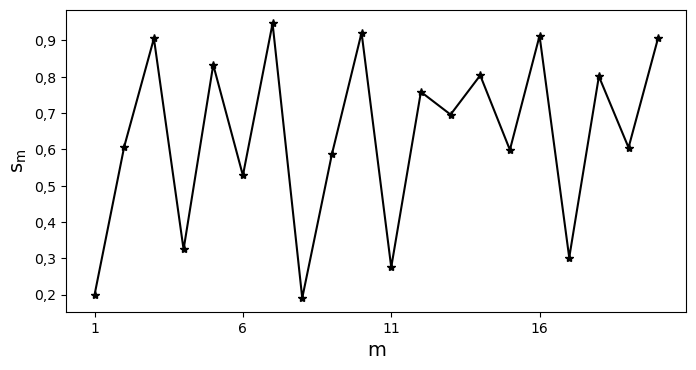

In [3]:
# Creating and plotting the time series #1
data1 = [0.20000000, 0.60800000, 0.90567680, 0.32462007, 0.83311914, 0.52832022, 0.94695227, 0.19088795, 0.58690901, 
         0.92129793, 0.27553060, 0.75853125, 0.69601406, 0.80399826, 0.59882321, 0.91288909, 0.30218586, 0.80130435, 
         0.60501961, 0.90808935]

plt.figure(num= None, figsize=((8,4)), dpi=100)
plt.plot([x for x in range(1, len(data1)+1)], data1, '-*k')
plt.xlabel('m', fontsize=14)
plt.ylabel(r'$\mathrm{s_{m}}$', fontsize = 14)
plt.xticks([x for x in range(1, len(data1)+1, 5)], [x for x in range(1, len(data1)+1, 5)])
plt.show()

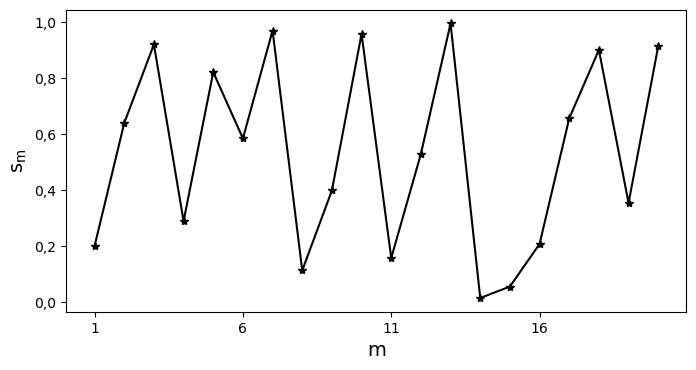

In [4]:
# Creating and plotting the time series #2
data2 = [0.20001000, 0.64002400, 0.92157312, 0.28910442, 0.82209222, 0.58502640, 0.97108205, 0.11232682, 0.39883801, 
         0.95906501, 0.15703728, 0.52950629, 0.99651751, 0.01388143, 0.05475495, 0.20702737, 0.65666815, 0.90182036, 
         0.35416159, 0.91492463]

plt.figure(num= None, figsize=((8,4)), dpi=100)
plt.plot([x for x in range(1, len(data2)+1)], data2, '-*k')
plt.xlabel('m', fontsize=14)
plt.ylabel(r'$\mathrm{s_{m}}$', fontsize = 14)
plt.xticks([x for x in range(1, len(data2)+1, 5)], [x for x in range(1, len(data2)+1, 5)])
plt.show()

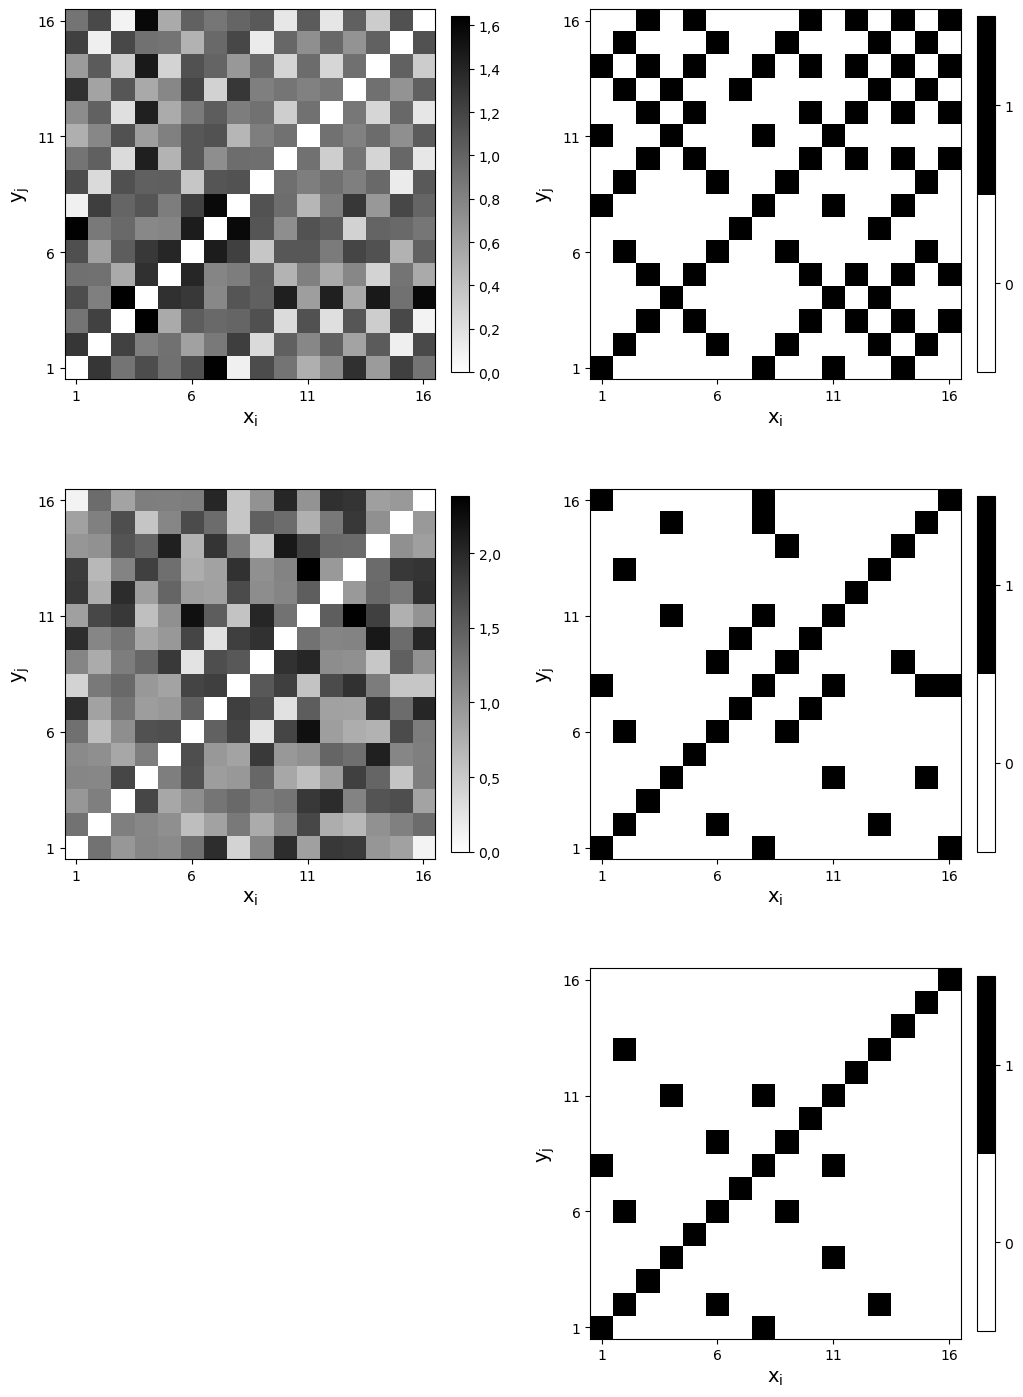

In [5]:
# Creating and plotting distance matrix and cross recurrence plot using Manhattan distance
dimension1, delay1, threshold1, norm1 = 3, 2, 0.7, "manhattan"
dimension2, delay2, threshold2, norm2 = 3, 2, 0.7, "manhattan"
distance_matrix_1 = jrp.distance_matrix(data1, dimension1, delay1, norm1)
distance_matrix_2 = jrp.distance_matrix(data2, dimension2, delay2, norm2)
recurrence_matrix_1 = jrp.recurrence_matrix(data1, dimension1, delay1, threshold1, norm1)
recurrence_matrix_2 = jrp.recurrence_matrix(data2, dimension2, delay2, threshold2, norm2)
joint_matrix = jrp.joint_matrix(data1, data2, dimension1, dimension2, delay1, delay2, threshold1, threshold2, norm1, norm2)
LIN = len(joint_matrix[:,0])
COL = len(joint_matrix[0])

plt.figure(num=None, figsize=((12,18)), dpi= 100)
plt.subplots_adjust(wspace = 0.3)
plt.subplot(3,2,1)
plt.imshow(distance_matrix_1, cmap = 'binary')
plt.axis([-0.5, COL-0.5, -0.5, LIN-0.5])
plt.xlabel(r'$\mathrm{x_{i}}$', fontsize=14)
plt.ylabel(r'$\mathrm{y_{j}}$', fontsize=14)
plt.xticks([x for x in range(0, COL, 5)], [x+1 for x in range(0, COL, 5)])
plt.yticks([x for x in range(0, LIN, 5)], [x+1 for x in range(0, LIN, 5)])
plt.colorbar(fraction=0.044, pad=0.04)
plt.subplot(3,2,2)
cmap = plt.get_cmap('binary', 2)
plt.imshow(recurrence_matrix_1, cmap = cmap, vmin = 0, vmax = 1)
plt.axis([-0.5, COL-0.5, -0.5, LIN-0.5])
plt.xlabel(r'$\mathrm{x_{i}}$', fontsize=14)
plt.ylabel(r'$\mathrm{y_{j}}$', fontsize=14)
plt.xticks([x for x in range(0, COL, 5)], [x+1 for x in range(0, COL, 5)])
plt.yticks([x for x in range(0, LIN, 5)], [x+1 for x in range(0, LIN, 5)])
cbar = plt.colorbar(fraction=0.044, pad=0.04, ticks=[0.25,0.75])
cbar.ax.set_yticklabels(['0', '1'])
plt.subplot(3,2,3)
plt.imshow(distance_matrix_2, cmap = 'binary')
plt.axis([-0.5, COL-0.5, -0.5, LIN-0.5])
plt.xlabel(r'$\mathrm{x_{i}}$', fontsize=14)
plt.ylabel(r'$\mathrm{y_{j}}$', fontsize=14)
plt.xticks([x for x in range(0, COL, 5)], [x+1 for x in range(0, COL, 5)])
plt.yticks([x for x in range(0, LIN, 5)], [x+1 for x in range(0, LIN, 5)])
plt.colorbar(fraction=0.044, pad=0.04)
plt.subplot(3,2,4)
cmap = plt.get_cmap('binary', 2)
plt.imshow(recurrence_matrix_2, cmap = cmap, vmin = 0, vmax = 1)
plt.axis([-0.5, COL-0.5, -0.5, LIN-0.5])
plt.xlabel(r'$\mathrm{x_{i}}$', fontsize=14)
plt.ylabel(r'$\mathrm{y_{j}}$', fontsize=14)
plt.xticks([x for x in range(0, COL, 5)], [x+1 for x in range(0, COL, 5)])
plt.yticks([x for x in range(0, LIN, 5)], [x+1 for x in range(0, LIN, 5)])
cbar = plt.colorbar(fraction=0.044, pad=0.04, ticks=[0.25,0.75])
cbar.ax.set_yticklabels(['0', '1'])
plt.subplot(3,2,6)
cmap = plt.get_cmap('binary', 2)
plt.imshow(joint_matrix, cmap = cmap, vmin = 0, vmax = 1)
plt.axis([-0.5, COL-0.5, -0.5, LIN-0.5])
plt.xlabel(r'$\mathrm{x_{i}}$', fontsize=14)
plt.ylabel(r'$\mathrm{y_{j}}$', fontsize=14)
plt.xticks([x for x in range(0, COL, 5)], [x+1 for x in range(0, COL, 5)])
plt.yticks([x for x in range(0, LIN, 5)], [x+1 for x in range(0, LIN, 5)])
cbar = plt.colorbar(fraction=0.044, pad=0.04, ticks=[0.25,0.75])
cbar.ax.set_yticklabels(['0', '1'])
plt.show()

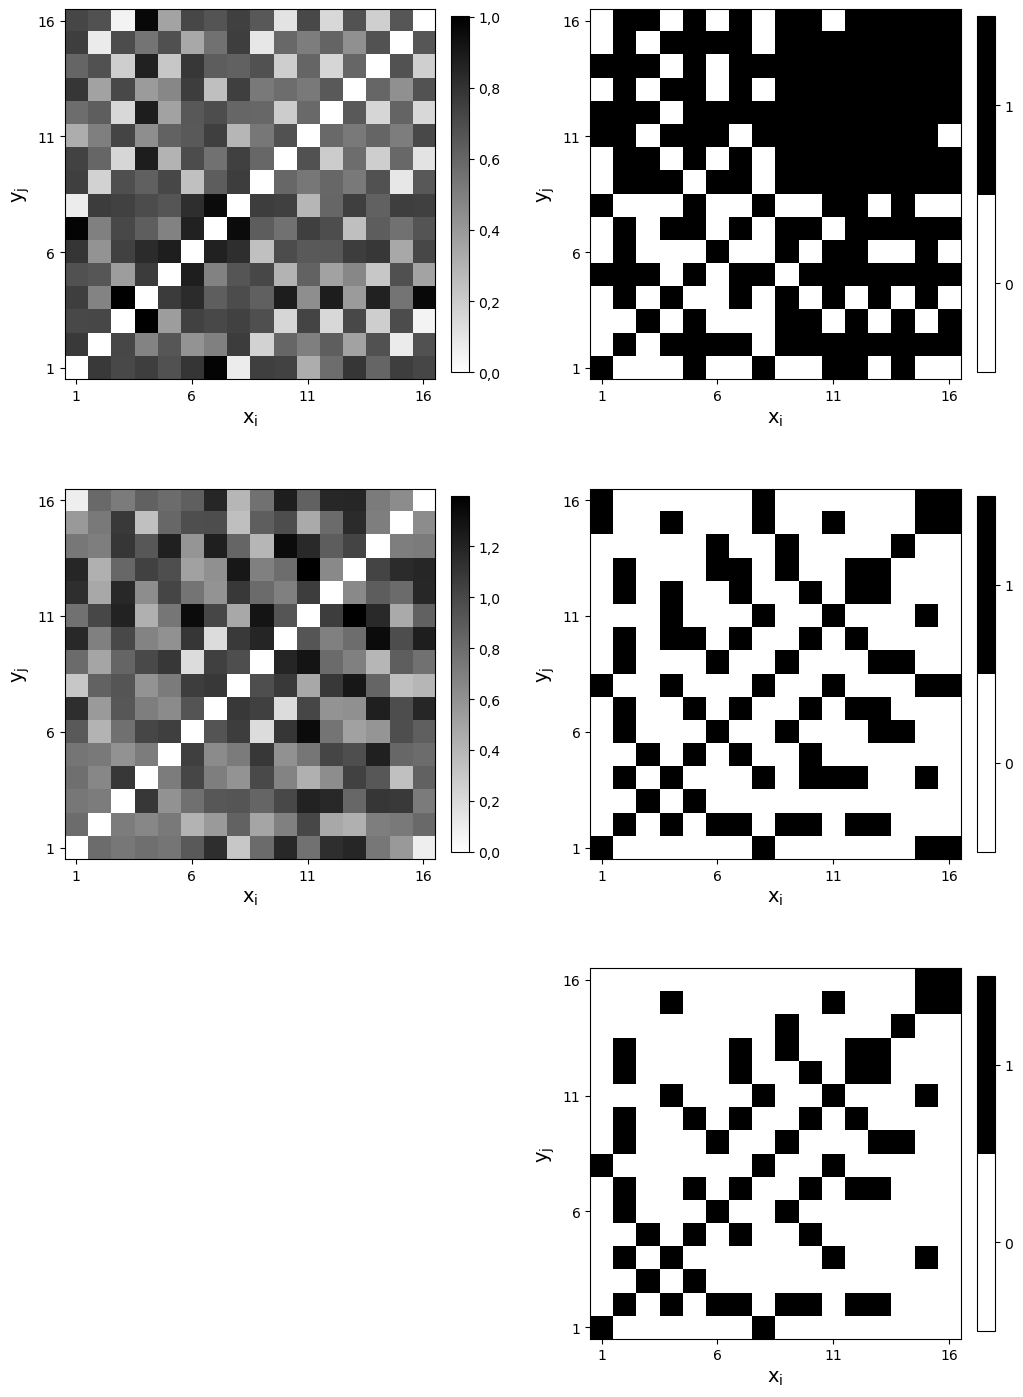

In [6]:
# Creating and plotting distance matrix and cross recurrence plot using Euclidean distance
dimension1, delay1, threshold1, norm1 = 3, 2, 0.7, "euclidean"
dimension2, delay2, threshold2, norm2 = 3, 2, 0.7, "euclidean"
distance_matrix_1 = jrp.distance_matrix(data1, dimension1, delay1, norm1)
distance_matrix_2 = jrp.distance_matrix(data2, dimension2, delay2, norm2)
recurrence_matrix_1 = jrp.recurrence_matrix(data1, dimension1, delay1, threshold1, norm1)
recurrence_matrix_2 = jrp.recurrence_matrix(data2, dimension2, delay2, threshold2, norm2)
joint_matrix = jrp.joint_matrix(data1, data2, dimension1, dimension2, delay1, delay2, threshold1, threshold2, norm1, norm2)
LIN = len(joint_matrix[:,0])
COL = len(joint_matrix[0])

plt.figure(num=None, figsize=((12,18)), dpi= 100)
plt.subplots_adjust(wspace = 0.3)
plt.subplot(3,2,1)
plt.imshow(distance_matrix_1, cmap = 'binary')
plt.axis([-0.5, COL-0.5, -0.5, LIN-0.5])
plt.xlabel(r'$\mathrm{x_{i}}$', fontsize=14)
plt.ylabel(r'$\mathrm{y_{j}}$', fontsize=14)
plt.xticks([x for x in range(0, COL, 5)], [x+1 for x in range(0, COL, 5)])
plt.yticks([x for x in range(0, LIN, 5)], [x+1 for x in range(0, LIN, 5)])
plt.colorbar(fraction=0.044, pad=0.04)
plt.subplot(3,2,2)
cmap = plt.get_cmap('binary', 2)
plt.imshow(recurrence_matrix_1, cmap = cmap, vmin = 0, vmax = 1)
plt.axis([-0.5, COL-0.5, -0.5, LIN-0.5])
plt.xlabel(r'$\mathrm{x_{i}}$', fontsize=14)
plt.ylabel(r'$\mathrm{y_{j}}$', fontsize=14)
plt.xticks([x for x in range(0, COL, 5)], [x+1 for x in range(0, COL, 5)])
plt.yticks([x for x in range(0, LIN, 5)], [x+1 for x in range(0, LIN, 5)])
cbar = plt.colorbar(fraction=0.044, pad=0.04, ticks=[0.25,0.75])
cbar.ax.set_yticklabels(['0', '1'])
plt.subplot(3,2,3)
plt.imshow(distance_matrix_2, cmap = 'binary')
plt.axis([-0.5, COL-0.5, -0.5, LIN-0.5])
plt.xlabel(r'$\mathrm{x_{i}}$', fontsize=14)
plt.ylabel(r'$\mathrm{y_{j}}$', fontsize=14)
plt.xticks([x for x in range(0, COL, 5)], [x+1 for x in range(0, COL, 5)])
plt.yticks([x for x in range(0, LIN, 5)], [x+1 for x in range(0, LIN, 5)])
plt.colorbar(fraction=0.044, pad=0.04)
plt.subplot(3,2,4)
cmap = plt.get_cmap('binary', 2)
plt.imshow(recurrence_matrix_2, cmap = cmap, vmin = 0, vmax = 1)
plt.axis([-0.5, COL-0.5, -0.5, LIN-0.5])
plt.xlabel(r'$\mathrm{x_{i}}$', fontsize=14)
plt.ylabel(r'$\mathrm{y_{j}}$', fontsize=14)
plt.xticks([x for x in range(0, COL, 5)], [x+1 for x in range(0, COL, 5)])
plt.yticks([x for x in range(0, LIN, 5)], [x+1 for x in range(0, LIN, 5)])
cbar = plt.colorbar(fraction=0.044, pad=0.04, ticks=[0.25,0.75])
cbar.ax.set_yticklabels(['0', '1'])
plt.subplot(3,2,6)
cmap = plt.get_cmap('binary', 2)
plt.imshow(joint_matrix, cmap = cmap, vmin = 0, vmax = 1)
plt.axis([-0.5, COL-0.5, -0.5, LIN-0.5])
plt.xlabel(r'$\mathrm{x_{i}}$', fontsize=14)
plt.ylabel(r'$\mathrm{y_{j}}$', fontsize=14)
plt.xticks([x for x in range(0, COL, 5)], [x+1 for x in range(0, COL, 5)])
plt.yticks([x for x in range(0, LIN, 5)], [x+1 for x in range(0, LIN, 5)])
cbar = plt.colorbar(fraction=0.044, pad=0.04, ticks=[0.25,0.75])
cbar.ax.set_yticklabels(['0', '1'])
plt.show()

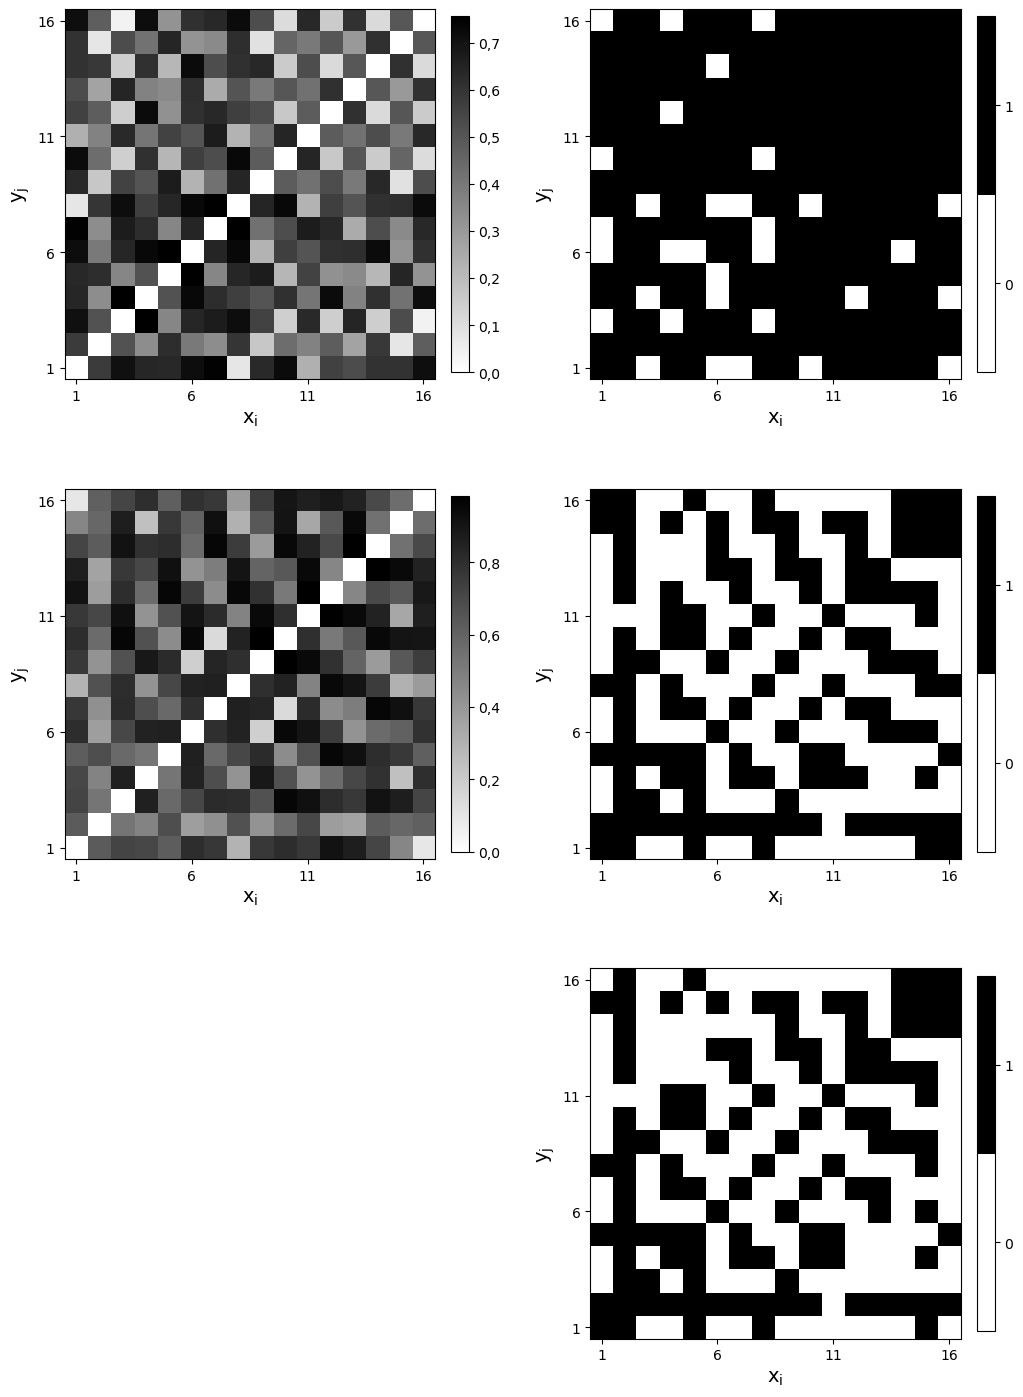

In [7]:
# Creating and plotting distance matrix and cross recurrence plot using Supremum distance
dimension1, delay1, threshold1, norm1 = 3, 2, 0.7, "supremum"
dimension2, delay2, threshold2, norm2 = 3, 2, 0.7, "supremum"
distance_matrix_1 = jrp.distance_matrix(data1, dimension1, delay1, norm1)
distance_matrix_2 = jrp.distance_matrix(data2, dimension2, delay2, norm2)
recurrence_matrix_1 = jrp.recurrence_matrix(data1, dimension1, delay1, threshold1, norm1)
recurrence_matrix_2 = jrp.recurrence_matrix(data2, dimension2, delay2, threshold2, norm2)
joint_matrix = jrp.joint_matrix(data1, data2, dimension1, dimension2, delay1, delay2, threshold1, threshold2, norm1, norm2)
LIN = len(joint_matrix[:,0])
COL = len(joint_matrix[0])

plt.figure(num=None, figsize=((12,18)), dpi= 100)
plt.subplots_adjust(wspace = 0.3)
plt.subplot(3,2,1)
plt.imshow(distance_matrix_1, cmap = 'binary')
plt.axis([-0.5, COL-0.5, -0.5, LIN-0.5])
plt.xlabel(r'$\mathrm{x_{i}}$', fontsize=14)
plt.ylabel(r'$\mathrm{y_{j}}$', fontsize=14)
plt.xticks([x for x in range(0, COL, 5)], [x+1 for x in range(0, COL, 5)])
plt.yticks([x for x in range(0, LIN, 5)], [x+1 for x in range(0, LIN, 5)])
plt.colorbar(fraction=0.044, pad=0.04)
plt.subplot(3,2,2)
cmap = plt.get_cmap('binary', 2)
plt.imshow(recurrence_matrix_1, cmap = cmap, vmin = 0, vmax = 1)
plt.axis([-0.5, COL-0.5, -0.5, LIN-0.5])
plt.xlabel(r'$\mathrm{x_{i}}$', fontsize=14)
plt.ylabel(r'$\mathrm{y_{j}}$', fontsize=14)
plt.xticks([x for x in range(0, COL, 5)], [x+1 for x in range(0, COL, 5)])
plt.yticks([x for x in range(0, LIN, 5)], [x+1 for x in range(0, LIN, 5)])
cbar = plt.colorbar(fraction=0.044, pad=0.04, ticks=[0.25,0.75])
cbar.ax.set_yticklabels(['0', '1'])
plt.subplot(3,2,3)
plt.imshow(distance_matrix_2, cmap = 'binary')
plt.axis([-0.5, COL-0.5, -0.5, LIN-0.5])
plt.xlabel(r'$\mathrm{x_{i}}$', fontsize=14)
plt.ylabel(r'$\mathrm{y_{j}}$', fontsize=14)
plt.xticks([x for x in range(0, COL, 5)], [x+1 for x in range(0, COL, 5)])
plt.yticks([x for x in range(0, LIN, 5)], [x+1 for x in range(0, LIN, 5)])
plt.colorbar(fraction=0.044, pad=0.04)
plt.subplot(3,2,4)
cmap = plt.get_cmap('binary', 2)
plt.imshow(recurrence_matrix_2, cmap = cmap, vmin = 0, vmax = 1)
plt.axis([-0.5, COL-0.5, -0.5, LIN-0.5])
plt.xlabel(r'$\mathrm{x_{i}}$', fontsize=14)
plt.ylabel(r'$\mathrm{y_{j}}$', fontsize=14)
plt.xticks([x for x in range(0, COL, 5)], [x+1 for x in range(0, COL, 5)])
plt.yticks([x for x in range(0, LIN, 5)], [x+1 for x in range(0, LIN, 5)])
cbar = plt.colorbar(fraction=0.044, pad=0.04, ticks=[0.25,0.75])
cbar.ax.set_yticklabels(['0', '1'])
plt.subplot(3,2,6)
cmap = plt.get_cmap('binary', 2)
plt.imshow(joint_matrix, cmap = cmap, vmin = 0, vmax = 1)
plt.axis([-0.5, COL-0.5, -0.5, LIN-0.5])
plt.xlabel(r'$\mathrm{x_{i}}$', fontsize=14)
plt.ylabel(r'$\mathrm{y_{j}}$', fontsize=14)
plt.xticks([x for x in range(0, COL, 5)], [x+1 for x in range(0, COL, 5)])
plt.yticks([x for x in range(0, LIN, 5)], [x+1 for x in range(0, LIN, 5)])
cbar = plt.colorbar(fraction=0.044, pad=0.04, ticks=[0.25,0.75])
cbar.ax.set_yticklabels(['0', '1'])
plt.show()

## 1.2 References

[1] Takens F., Detecting strange attractors in turbulence, In: Rand D., Young LS. (eds) Dynamical Systems and Turbulence, Warwick 1980. Lecture Notes in Mathematics, vol 898. Springer, Berlin, Heidelberg (1981). DOI: [10.1007/BFb0091924](https://doi.org/10.1007/BFb0091924)

[2] M. B. Kennel, R. Brown, H. D. I. Abarbanel, Determining embedding dimension for phase-space reconstruction using a geometrical construction, Physical Review A, 45(6), 3403-3411p (1992). DOI: [10.1103/PhysRevA.45.3403](https://doi.org/10.1103/PhysRevA.45.3403)

[3] L. Cao, Practical method for determining the minimum embedding dimension of a scalar time series, Physica D: Nonlinear Phenomena, 110(12), 43-50p (1997). DOI: [10.1016/S0167-2789(97)00118-8](https://doi.org/10.1016/S0167-2789(97)00118-8)

[4] A. Fraser, H. Swinney, Independent coordinates for strange attractors from mutual information, Physical Review A, 33(2), 1134-1140p (1986). DOI: [10.1103/PhysRevA.33.1134](https://doi.org/10.1103/PhysRevA.33.1134)

[5] J.-P. Eckmann, S. Oliffson Kamphorst and D. Ruelle, Recurrence Plots of Dynamical Systems, Europhysics Letters, 4(9), 973-977p (1987). DOI: [10.1209/0295-5075/4/9/004](https://doi.org/10.1209/0295-5075/4/9/004)

[6] Romano, M. C., Thiel, M., Kurths, J., von Bloh, W., Multivariate Recurrence Plots, Physics Letters A, 330(3-4), 214-223p (2004). [10.1016/j.physleta.2004.07.066](https://doi.org/10.1016/j.physleta.2004.07.066)